Load the Dataset(Iris) from the sklearn

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [7]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


# Cross Validation - Example

Split the datasets into 5 folds using KFold from model_selection class

In [5]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


# Parameter Tuning

Find the best value for the K

In [6]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knn,X,y,cv=10,scoring="accuracy").mean())

0.9666666666666668


In [7]:
#find the k value from the range between 1 and 30

k_range=range(1,31)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring="accuracy").mean()
    k_scores.append(scores)
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'K_scores')

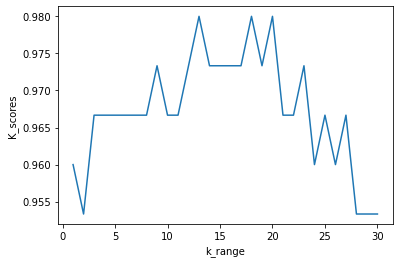

In [8]:
#Show the K_scores value in the Graph using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,k_scores)
plt.xlabel("k_range")
plt.ylabel("K_scores")

# Model Selection

Find the best model whether KNN or L-Reg

In [14]:
#Logistic Regression model

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring="accuracy").mean())

/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

0.9733333333333334


/home/bhuvi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#KNN model

knn=KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,scoring="accuracy").mean())

0.96


Logistic Regression is Best Model for this Case

# Feature Selction

Find the best pair Features for the Prediction

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [19]:
#read the data(csv_file) from the device

data=pd.read_csv("data/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
#Set the X and y value for the Model design

feature_cols=["TV","Radio","Newspaper"]
X=data[feature_cols]
y=data.Sales

In [34]:
#Calculate the errors for the L-Regression model

linreg=LinearRegression()
scores=cross_val_score(linreg,X,y,cv=10,scoring="neg_mean_squared_error")
scores

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [38]:
#MSE

mse_scores=-scores
print("MSE: ",mse_scores)

MSE:  [3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [37]:
#RMSE

rmse_scores=np.sqrt(mse_scores)
print("RMSE: ",rmse_scores)

RMSE:  [1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [40]:
#Average RMSE

print("Average RMSE: ",rmse_scores.mean())

Average RMSE:  1.6913531708051797


In [42]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
scores=cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
scores

array([-3.38264572, -3.28736055, -2.09185507, -2.81784389, -1.27311083,
       -1.74391853, -8.0006111 , -2.07650936, -3.03635301, -2.4289835 ])

In [43]:
#MSE

mse_scores=-scores
print("MSE: ",mse_scores)

MSE:  [3.38264572 3.28736055 2.09185507 2.81784389 1.27311083 1.74391853
 8.0006111  2.07650936 3.03635301 2.4289835 ]


In [44]:
#RMSE

rmse_scores=np.sqrt(mse_scores)
print("RMSE: ",rmse_scores)

RMSE:  [1.83919703 1.81310798 1.44632468 1.67864347 1.12832213 1.32057507
 2.82853515 1.44100984 1.74251342 1.55851965]


In [45]:
#Average RMSE

print("Average RMSE: ",rmse_scores.mean())

Average RMSE:  1.6796748419090766


In [48]:
# 10-fold cross-validation with two features (excluding Radio)
feature_cols = ['TV', 'Newspaper']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

3.107683697582439


In [50]:
# 10-fold cross-validation with two features (excluding TV)
feature_cols = ['Radio', 'Newspaper']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

4.265009423551607


TV and Radio are the best Features in this Case.